In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [33]:
data = pd.read_excel('/Users/mustafacitak/Desktop/Python/ML/Regression/LoR_Dataset.xlsx')
print(data.head())

   Age  Gender  Revenue Product_Purchase
0   25    Male     2000              Yes
1   30  Female     3000               No
2   35    Male     4000              Yes
3   40  Female     5000              Yes
4   45    Male     6000               No


In [34]:
# Label Encoding işlemi
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

In [35]:
# X ve y değişkenlerini belirleme
X = data[['Age', 'Gender', 'Revenue']]
y = data['Product_Purchase']

In [41]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)

# Polinom regresyon modeli oluşturma ve eğitme
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LogisticRegression()
model.fit(X_poly, y)

LogisticRegression()

In [42]:
# Modelin eğitim ve test setlerindeki doğruluğunu hesaplama
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print('Eğitim Seti Doğruluk Oranı:', train_accuracy)
print('Test Seti Doğruluk Oranı:', test_accuracy)

Eğitim Seti Doğruluk Oranı: 0.8260869565217391
Test Seti Doğruluk Oranı: 1.0


In [43]:
# "Age:25", "Gender:Female" ve "Revenue:3500" özelliklerine sahip bir kişi için "Product_Purchase" tahmini yapma
customer_data = poly.transform([[25, 0, 3500]])
product_purchase_prediction = model.predict(customer_data)
print('Ürün Satın Alma Durumu:', product_purchase_prediction)

Ürün Satın Alma Durumu: ['Yes']


/Users/mustafacitak/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


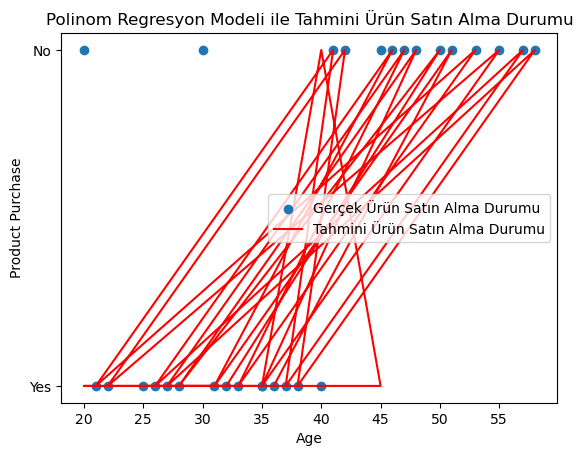

In [31]:
# Tahmin edilen ürün satın alma durumunu görselleştirme
plt.scatter(data['Age'], data['Product_Purchase'], label='Gerçek Ürün Satın Alma Durumu')
plt.plot(data['Age'], model.predict(X_poly), color='red', label='Tahmini Ürün Satın Alma Durumu')
plt.xlabel('Age')
plt.ylabel('Product Purchase')
plt.title('Polinom Regresyon Modeli ile Tahmini Ürün Satın Alma Durumu')
plt.legend()
plt.show()
